# Convolution

In the last few years, CNNs have become popular in the areas of image recognition, object detection, segmentation, and many other tasks in the field of computer vision. They are also becoming popular in the field of **natural language processing (NLP)**.

The fundamental difference between fully connected layers and convolution layers is the way the weights are connected to each other in the intermediate layers.

One of the biggest challenges of using a linear layer or fully connected layers for computer vision is that they lose all spatial information, and the complexity in terms of the number of weights used by fully connected layers is too big. For example, when we represent a $224\times 224$ color image as a flat array, we would end up with $150 528$-dimensional feature vector ($224 \times 224 \times 3$). When the image is flattened, we lose all the spatial information.

There is a better way! It consists in replacing the dense, fully-connected affine transformation in our neural network unit with a different linear operation: **convolution**.

### Why would you use a convolution?

Convolutions are very common operations. Here are some image processing examples:

* **Edge Detection:** can detect edges by convolving with edge masks (e.g., the Sobel edge detectors)

$$S_v = \left[\begin{array}{ccc}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{array}\right]$$

$$S_h = \left[\begin{array}{ccc}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right]$$

The vertical and horizontal Sobel edge masks.

* **Image Smoothing:** can smooth/blur images using a mean filter.

* **Unsharp Masking:** can sharpen imagery by subtracting a mean filtered image from the original.

* and many more...

* So, various convolutions have the ability to enhance and extract features of interest.

* The idea behind a convolutional neural network is to learn the features needed to perform classification (or regression) during the learning process for the neural network. This is in contrast with approaches in which you first identify features of importance, extract them in advance, and then train a classifier (e.g., a neural network) on the extracted features.

We would like these localized patterns to have an effect on the output no matter their location in the image, i.e. to be **translation-invariant**. 

To do that, we would need to force the weights in each per-output-pixel family of patterns to have same values, regardless of pixel location. To achieve this goal, we would need to initialize all weight matrices in a family with the same values, and, during back-propagation, average the gradients for all pixel locations and apply that average as the update to all weights in the family.

For this reason, CNNs are often called **shared weight neural networks**. This is because several connections in the network are tied together to have the same value.

**CNNs can have much fewer parameters than fully connected layers**

Consider a 2-D convolution (used, for example, in image processing):

$$g(x,y) \ast f(x,y) = \sum_{s=-a}^a \sum_{t=-b}^b g(s,t) f(x-s, y-t)$$

where $g$ is the filter and $f$ is the image to be convolved. Essentially, we flip both horizontally and vertically and, then, slide $g$ accross $f$ where at each location we perform a pointwise multiplication and then a sum.

To understand better how are we exactly creating a neural network that extracts features using convolution operations, we need to first consider that a convolutional can be written as a *linear operation* with a **doubly block circulant matrix**.

$$H(x,y) = F(x,y) \ast g(x,y)$$

is the same as

$$h = Gf$$

where $f$ and $h$ are the vectorized forms of $F$ and $G$ is a doubly block circulant matrix.

Consider the following small image:

$$Im = \left[\begin{array}{cccc}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
9 & 10 & 11 & 12\\
13 & 14 & 15 & 16
\end{array}\right]$$

We can vectorize it and obtain:

$$I^T = [1,2,3,\dots, 14,15,16]$$

Let's consider the following kernel:

$$k = \left[\begin{array}{ccc}
-1 & -2 & -3\\
-4 & -5 & -6\\
-7 & -8 & -9
\end{array}\right]$$

Let $G$ be:

$$G = \left[\begin{array}{cccccccccccccccc}
-1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & -2 & -3 & 0 & -4 & -5 & -6 & 0 & -7 & -8 & -9\\
\end{array}\right]$$

So, we can write the convolution as the matrix multiplication:

$$GI$$

### Kernel/Filter Sizes

Small kernels, like $3 \times 3$ or $5 \times 5$ provide very local information. The problem is that we can not assume all structures in our images are 3 pixels or 5 pixels wide.

In order to identify larger objects in an image we will need large convolution kernels. Well, sure, at the limit we could get a
$32 \times 32$ kernel for a $32 \times 32$ image, but we would converge to the old fully connected, affine transformation and lose all the nice properties of convolution. 

Another option, which is what is used in convolutional neural networks, is stacking one convolution after the other, and at the same time downsampling the image in-between successive convolutions.

So, on one hand, the first set of kernels operates on small neighborhoods on first-order, low-level features, while the second set of kernels effectively operates on wider neighborhoods, producing features that are compositions of the previous features. This is a very powerful mechanism that provides convolutional neural networks with the ability to see into very complex scenes

### Pooling Layers & Strides

Downsampling could in principle occur in different ways. Scaling an image by a half is the equivalent of taking 4 neighboring pixels in input and producing one pixel in output. How we compute the value of the output based on the values of the input is up to us. We could:

* **Average-pooling**: average the four pixels. This was a common approach early on, but has since fallen out of favor somewhat.
* **Max-pooling**: take the maximum of the four pixels. This is currently the most commonly used approach, but has a downside of discarding the other 3/4ths of the data.
* **Stride**: perform a strided convolution, where only every Nth pixel is calculated. A 3x4 convolution with stride 2 still incorporates input from all pixels from the previous layer. Current literature shows promise for this approach, but it has not yet supplanted maxpool.

In [43]:
import tensorflow.keras as tk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
model = tk.Sequential()

model.add(tk.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tk.layers.BatchNormalization())
model.add(tk.layers.MaxPooling2D((2, 2)))

model.add(tk.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(tk.layers.BatchNormalization())
model.add(tk.layers.Dropout(0.25))

model.add(tk.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(tk.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tk.layers.Dropout(0.25))
                                 
model.add(tk.layers.Flatten())
                                 
model.add(tk.layers.Dense(128, activation='relu'))
model.add(tk.layers.BatchNormalization())
model.add(tk.layers.Dropout(0.5))
                                 
model.add(tk.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_30 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_31 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_30 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 16)      

In [45]:
dense_model = tk.models.Sequential(
    [
        tk.layers.Flatten(input_shape=(28,28,1)), 
        tk.layers.Dense(128, activation='relu'), # alternatively you could use activation=tf.nn.relu
        tk.layers.Dense(10, activation='softmax')
    ])
dense_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
fashion_mnist = tk.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


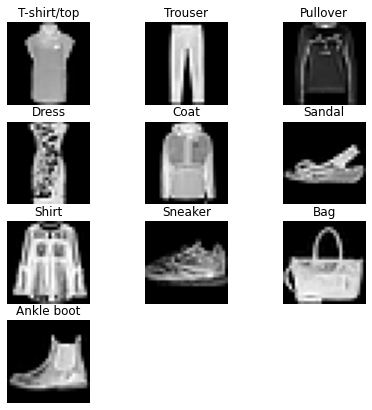

In [47]:
fig=plt.figure(figsize=(7,7))
for i in range(10):
    fig.add_subplot(4,3,i+1)
    idx = np.random.choice(np.where(train_labels==i)[0])
    plt.imshow(train_images[idx,:,:], cmap='gray')
    plt.axis('off')
    plt.title(class_names[i])

In [48]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000,)


In [49]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #Set patience lower when batchsize is big (steps per epoch > 30-5-)

epochs = 20
steps_per_epoch = 90

In [57]:

model.compile(loss='categorical_crossentropy',
              optimizer=tk.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
            batch_size=100,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            callbacks=[early_stopping],
            verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
90/90 [==============================] - 7s 70ms/step - loss: 0.2855 - accuracy: 0.8983
Epoch 2/20
90/90 [==============================] - 7s 78ms/step - loss: 0.2749 - accuracy: 0.9031
Epoch 3/20
90/90 [==============================] - 7s 73ms/step - loss: 0.2814 - accuracy: 0.8994
Epoch 4/20
90/90 [==============================] - 7s 73ms/step - loss: 0.2813 - accuracy: 0.8973
Epoch 5/20
90/90 [==============================] - 7s 75ms/step - loss: 0.2776 - accuracy: 0.9009
Epoch 6/20
90/90 [==============================] - 7s 72ms/step - loss: 0.2867 - accuracy: 0.8961
Epoch 7/20
90/90 [==============================] - 7s 73ms/step - loss: 0.2642 - accuracy: 0.9061
Epoch 8/20
90/90 [==============================] - 7s 78ms/step - loss: 0.2644 - accuracy: 0.9038
Epoch 9/20
90/90 [==============================] - 7s 72ms/step - loss: 0.2748 - accuracy: 0.8989
Epoch 10/20
90/90 [==============================] - 7s 73ms/step - loss: 0.2730 - accuracy: 0.9008
Epoch 11/

In [58]:
dense_model.compile(loss='categorical_crossentropy',
              optimizer=tk.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

dense_history = dense_model.fit(train_images, train_labels,
            batch_size=100,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            callbacks=[early_stopping],
            verbose=1)

test_loss, test_acc = dense_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
90/90 [==============================] - 1s 2ms/step - loss: 0.3036 - accuracy: 0.8897
Epoch 2/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8927
Epoch 3/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8910
Epoch 4/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8861
Epoch 5/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8867
Epoch 6/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8872
Epoch 7/20
90/90 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8900
Epoch 8/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8930
Epoch 9/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8944
Epoch 10/20
90/90 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.9013
Epoch 11/20
90/90 [

In [59]:
def plot_training_history(history):
    # Get the classification accuracy and loss-value
    # for the training-set.
    acc = history.history['accuracy']
    loss = history.history['loss']

    # Get it for the validation-set (we only use the test-set).
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Plot the accuracy and loss-values for the training-set.
    plt.plot(acc, color='b', label='Training Acc.')
    # plt.plot(loss, 'o', color='b', label='Training Loss')
    
    # Plot it for the test-set.
    plt.plot(val_acc, color='r', label='Test Acc.')
    plt.plot(val_loss, '--', color='r', label='Test Loss')

    # Plot title and legend.
    plt.title('Training and Test Accuracy')
    plt.legend()

    # Ensure the plot shows correctly.
    plt.show()

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [60]:
plot_training_history(history)

KeyError: 'val_accuracy'

In [ ]:
plot_training_history(dense_history)